In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gdal import *
from osgeo import *
import csv
import seaborn as sns

#### EL RANGO HAY QUE CAMBIARLO CUANDO CAMBIAMOS DE PUNTOS (VERA/DIEGO/NICO)

In [2]:
rangodefilas=range(54)

In [5]:
dataframe = pd.DataFrame(columns = ["anio", "id", "desviacion","media","k"])

for j in rangodefilas:
        
    for k in range(3): 
        
        for p in range(2010,2020):
            
            listadefechas = []
            anios=range(p,p+1)
            fechasporanio=range(1,365,8)
            for yy in anios:
                for d in fechasporanio:
                    listadefechas.append(str(yy)+"%03d"%d) 

            data = pd.DataFrame(columns = ['Unnamed: 0' , 'Unnamed: 0.1', 'promedio' , 'indice' , 'fecha'])
            df = pd.read_csv("/home/manuela/sancor-2.0/1CSV/Vera_so_csvs/Vera_so_" + str(j).zfill(3)+ "_mndwi_" + str(2*k+1) + "x" + str(2*k+1) +  ".csv")

            for i in range(len(listadefechas)):
                fila = df[df.fecha == int(listadefechas[i])]
                data = pd.concat([data,fila],axis=0)
                std = np.std(data.promedio)
                mean = np.mean(data.promedio)

            filaa = [p,str(j).zfill(3), std, mean,2*k+1]
            datafreim = pd.DataFrame (filaa,index=["anio", "id", "desviacion","media", "k"])
            dataframe = pd.concat([dataframe, datafreim.T], axis = 0)

In [9]:
pd.DataFrame(dataframe).to_csv("/home/manuela/sancor-2.0/1CSV/desviacion-media/vera_std_mean_mndwi.csv")

### ESTO ES SOLO PARA ACORDARME COMO SE FILTRA 

dataframe[dataframe.anio == 2010][dataframe[dataframe.anio == 2010].k == 1]

### y COMO SE ORDENA

dataframe = dataframe.sort_values('media')

In [9]:
dataframe[dataframe.anio == 2012][dataframe[dataframe.anio == 2012].k == 1].sort_values('media')

,Unnamed: 0,anio,id,desviacion,media,k
302,0,2012,10,0.070412,-0.561359,1
1382,0,2012,46,0.038502,-0.542749,1
242,0,2012,8,0.041096,-0.538251,1
2,0,2012,0,0.064345,-0.527475,1
422,0,2012,14,0.023113,-0.511192,1
572,0,2012,19,0.050888,-0.509722,1
362,0,2012,12,0.075676,-0.507496,1
92,0,2012,3,0.076058,-0.506002,1
602,0,2012,20,0.038525,-0.505710,1
1442,0,2012,48,0.075403,-0.503188,1


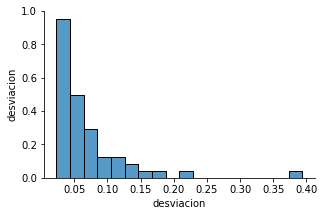

In [6]:
sns.pairplot(data=dataframe[dataframe.anio == 2012][dataframe[dataframe.anio == 2012].k == 1], height = 3, aspect =1.5, vars = ["desviacion"])

In [8]:
dataframe[dataframe.anio == 2012][dataframe[dataframe.anio == 2012].k == 1].media.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1   -0.509055
0.2   -0.500126
0.3   -0.490928
0.4   -0.484885
0.5   -0.482252
0.6   -0.479872
0.7   -0.473271
0.8   -0.458829
0.9   -0.428189
Name: media, dtype: float64

# TODO ESTO ESTÁ HECHO PARA LOS PUNTOS DE VERA CON MNDWI


#### ACÁ VEMOS CÓMO VARÍA LA MEDIA Y LA DESVIACIÓN A MEDIDA QUE AUMENTA EL K. 

#### EN TÉRMINOS GENERALES, VEMOS QUE A MEDIDA QUE EL K AUMENTA, LA DESVIACIÓN Y LA MEDIA DISMINUYEN. ES DECIR, LAS CURVAS DE LOS ÍNDICES SE SUAVIZAN A MEDIDA QUE TOMAMOS MÁS PÍXELES

#### VEMOS UN MÍNIMO EN AMBOS GRÁFICOS EN LOS AÑOS  2012 Y 2018. EN EL GRÁFICO DE LA MEDIA AMBOS PICOS SON MUY PRONUNCIADOS MIENTRAS QUE EN EL DE LA DESVIACIÓN SOLO TIENE UNA CAÍDA MUY PRONUNCIADA EN EL AÑO 2018.

#### EL MÁXIMO GLOBAL DE LA MEDIA SE ENCUENTRA EN EL AÑO 2019 Y LOS MÁXIMOS LOCALES EN LOS AÑOS 2015 Y 2017. EN EL GRÁFICO DE LA DESVIACIÓN, EL MÁXIMO SE ENCUENTRA EN EL AÑO 2015 Y 2019 Y 2017 PARECIERAN TAMBIÉN SER MÁXIMOS LOCALES


In [11]:
dataframe = pd.read_csv("/home/manuela/sancor-2.0/1CSV/desviacion-media/vera_std_mean_mndwi.csv")

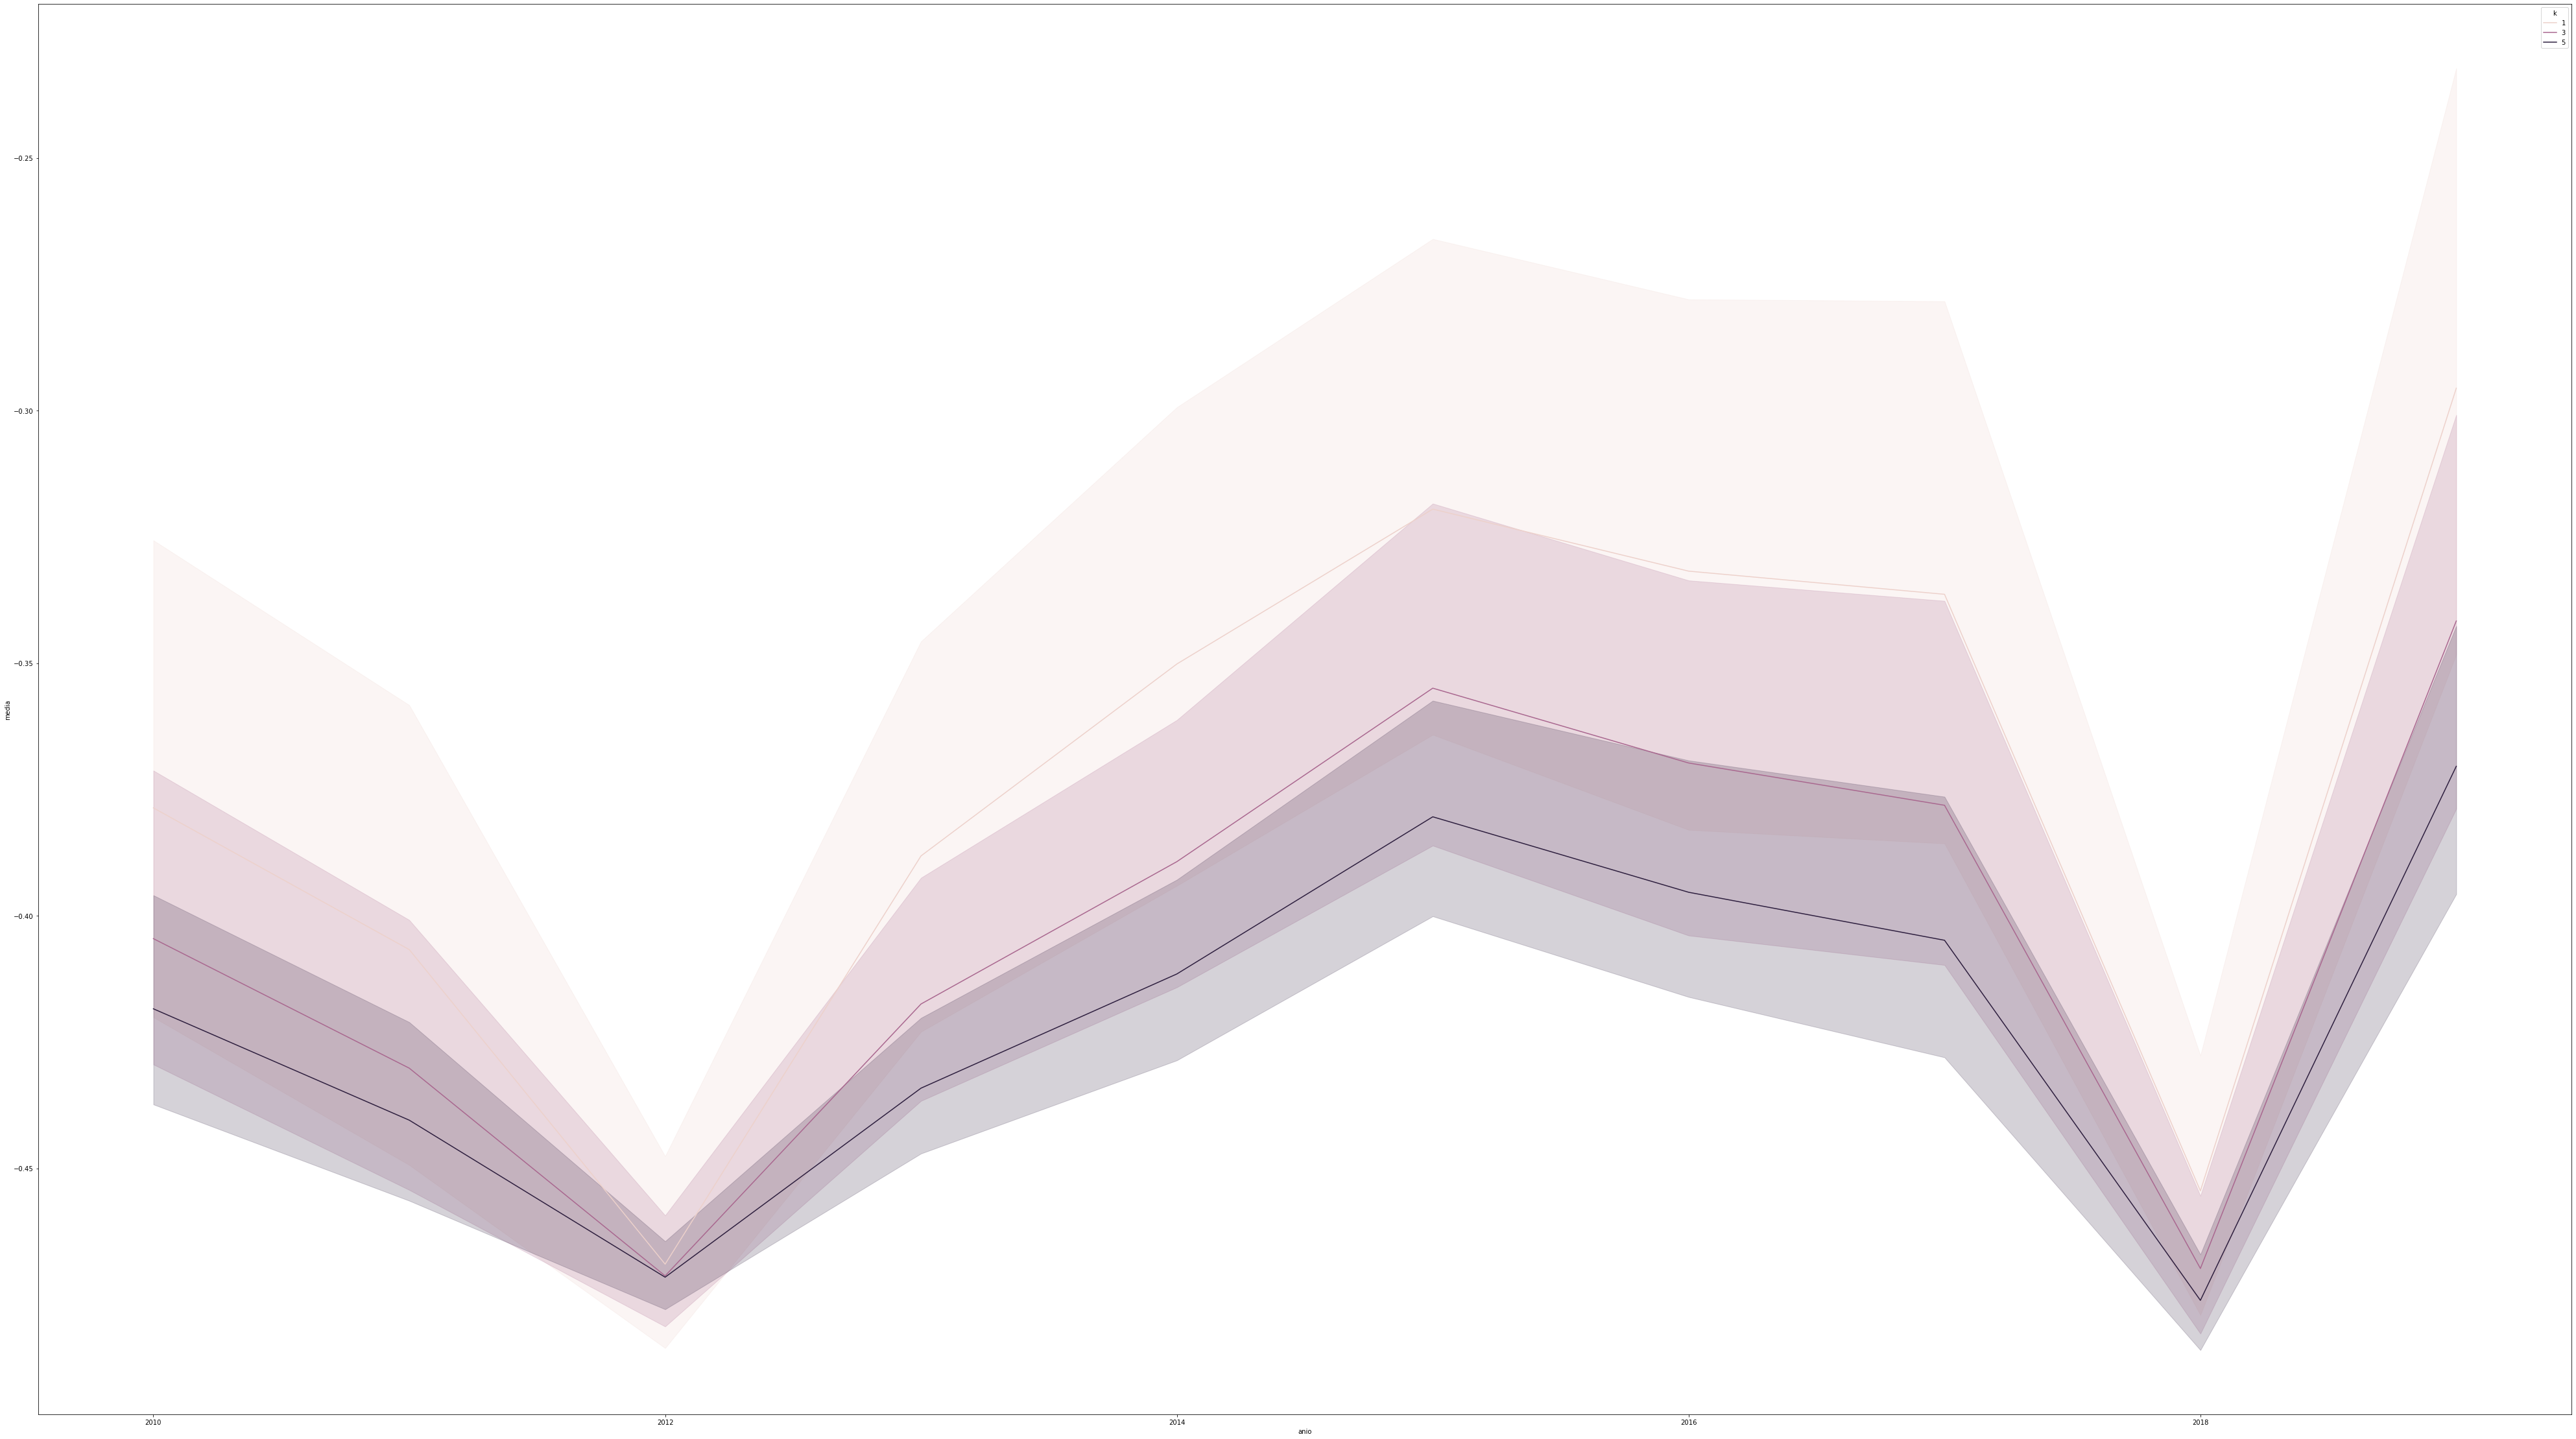

In [12]:
plt.figure(figsize=(70,40))
sns.lineplot(data=dataframe, x='anio', y = 'media', hue='k')

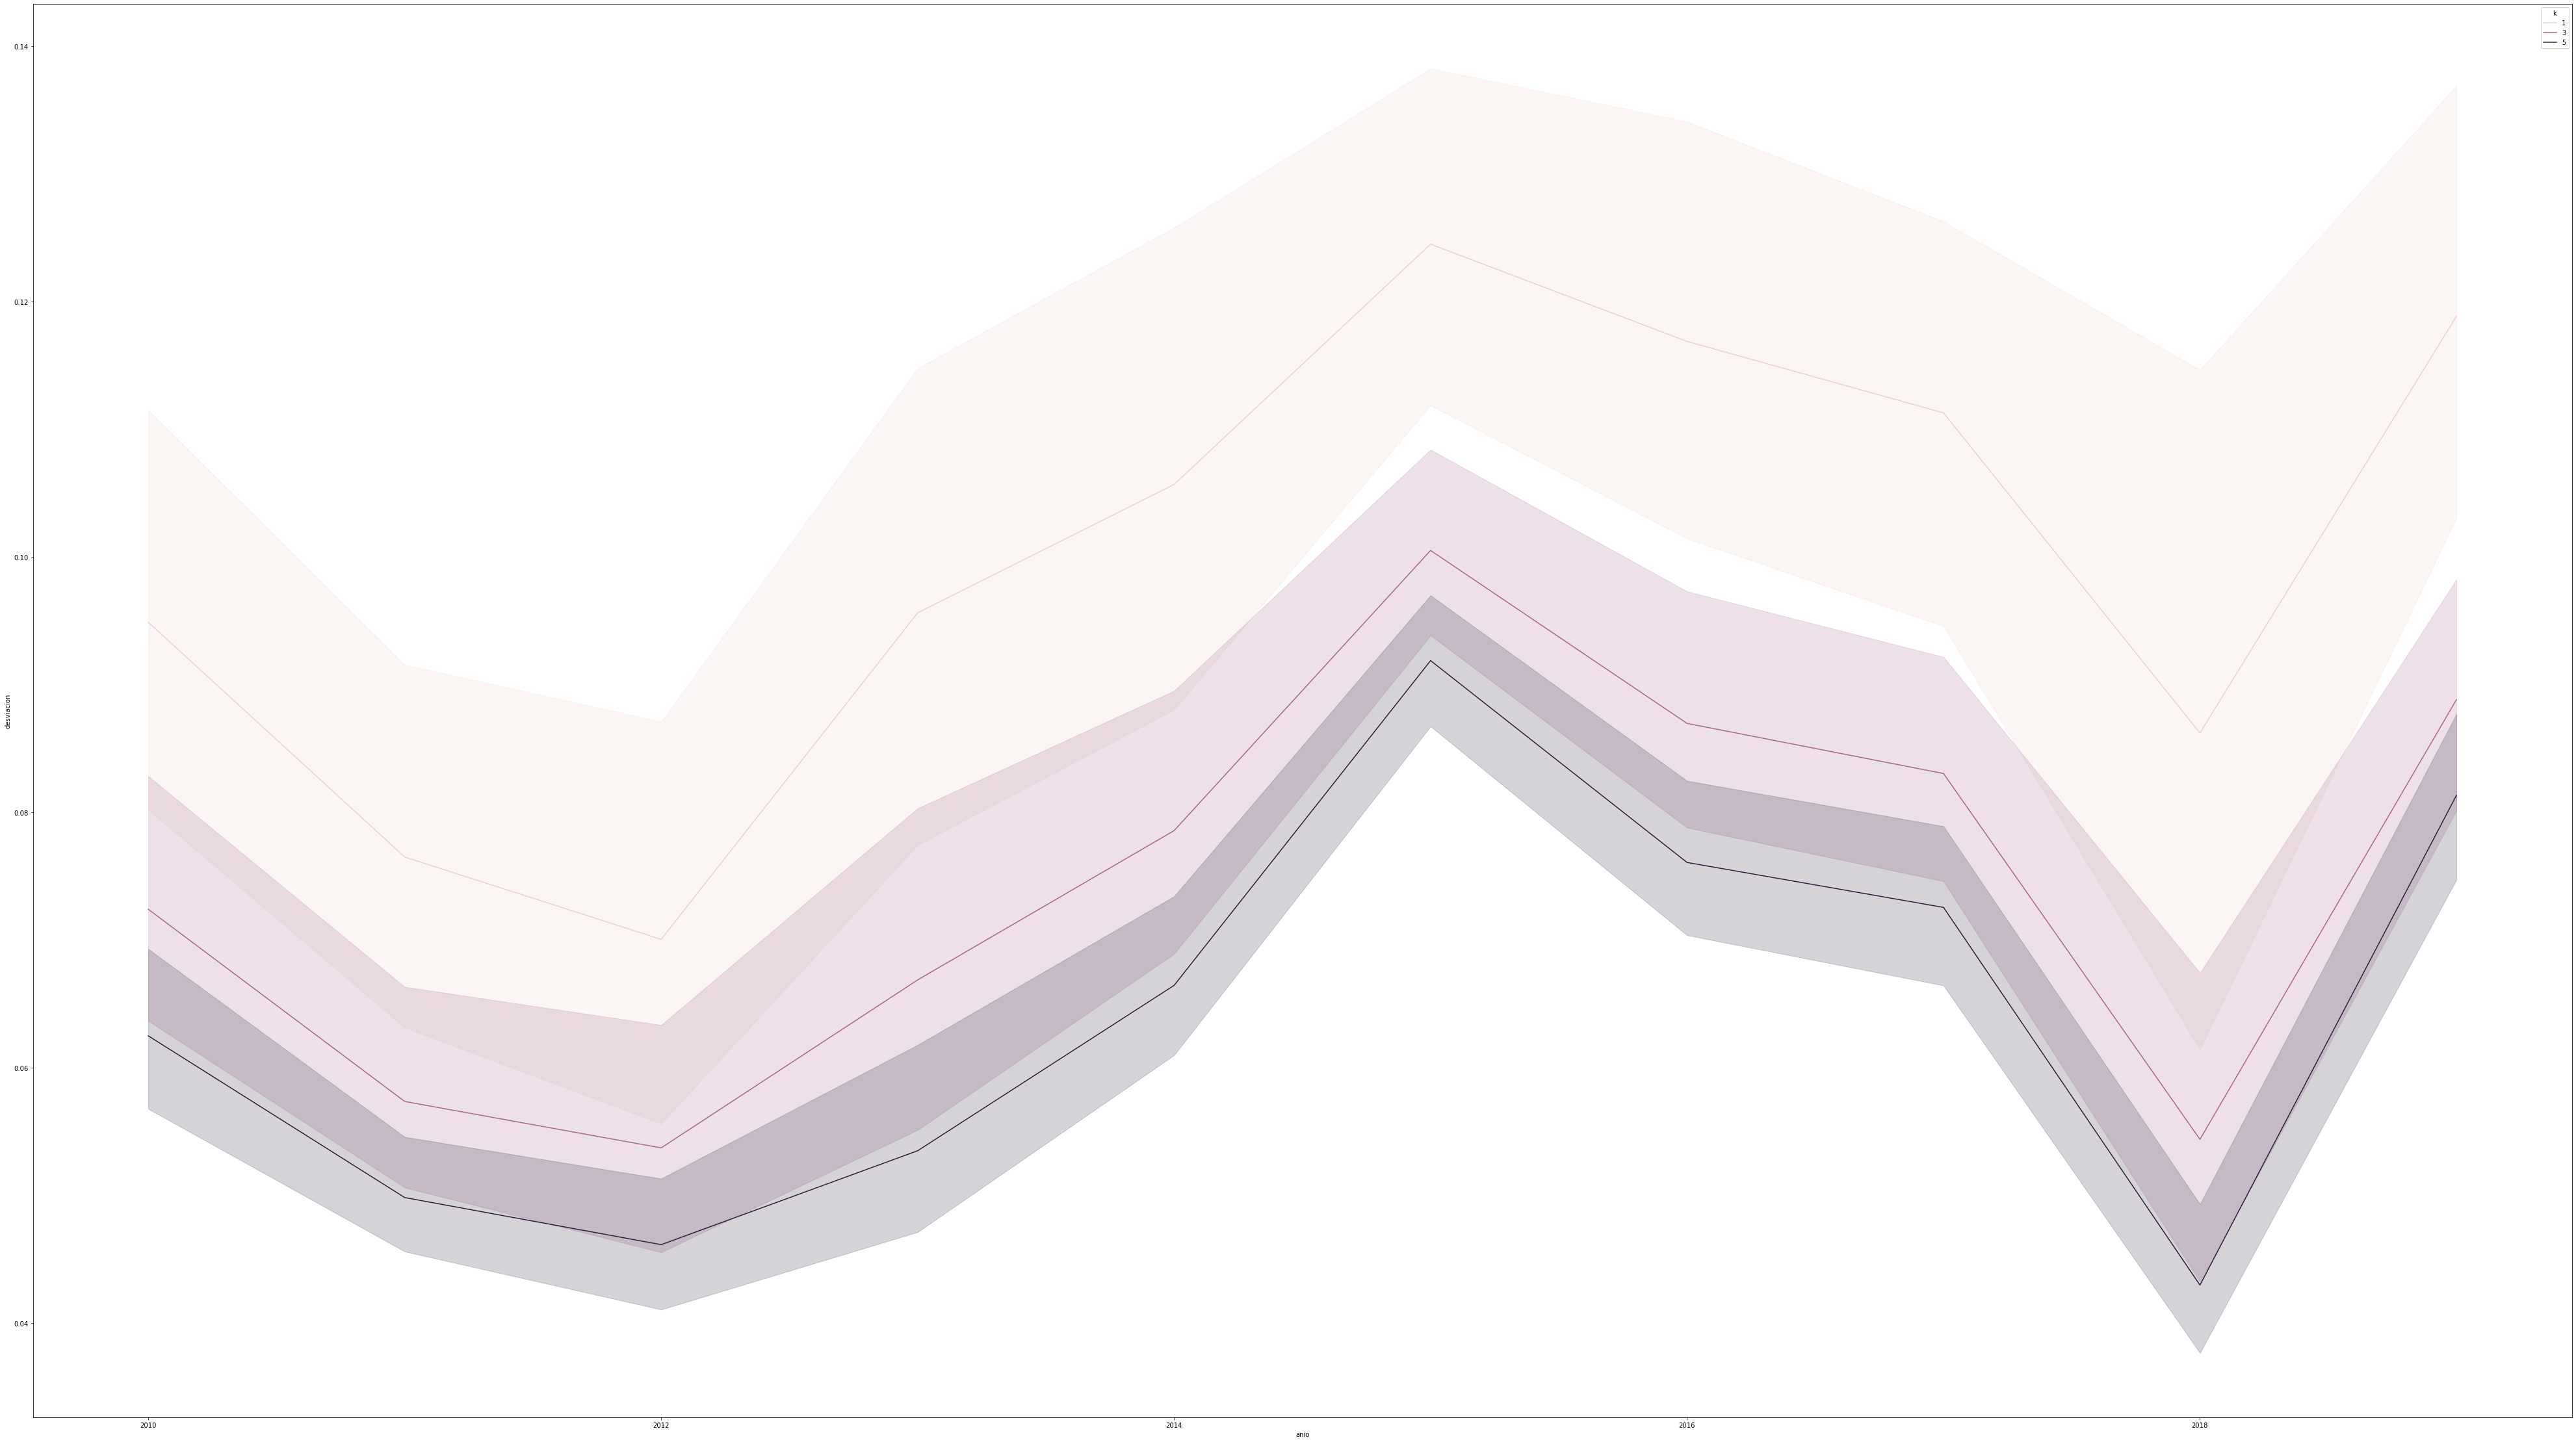

In [13]:
plt.figure(figsize=(70,40))
sns.lineplot(data=dataframe, x='anio', y = 'desviacion', hue='k')

#### PODEMOS ENCONTRAR EJEMPLOS EN LOS CUALES ESTO QUE VEMOS ARRIBA NO SE CUMPLE, COMO EN EL AÑO 2013 EN EL PUNTO 3 EN DONDE LA MEDIA AUMENTA A MEDIDA QUE EL K AUMENTA:

In [14]:
dataframe[dataframe.anio == 2013][dataframe[dataframe.anio == 2013].id == 3]

,Unnamed: 0,anio,id,desviacion,media,k
93,0,2013,3,0.117726,-0.437267,1
103,0,2013,3,0.098903,-0.452957,3
113,0,2013,3,0.084763,-0.462991,5


#### HACEMOS EL LINEPLOT DE ESE PUNTO:

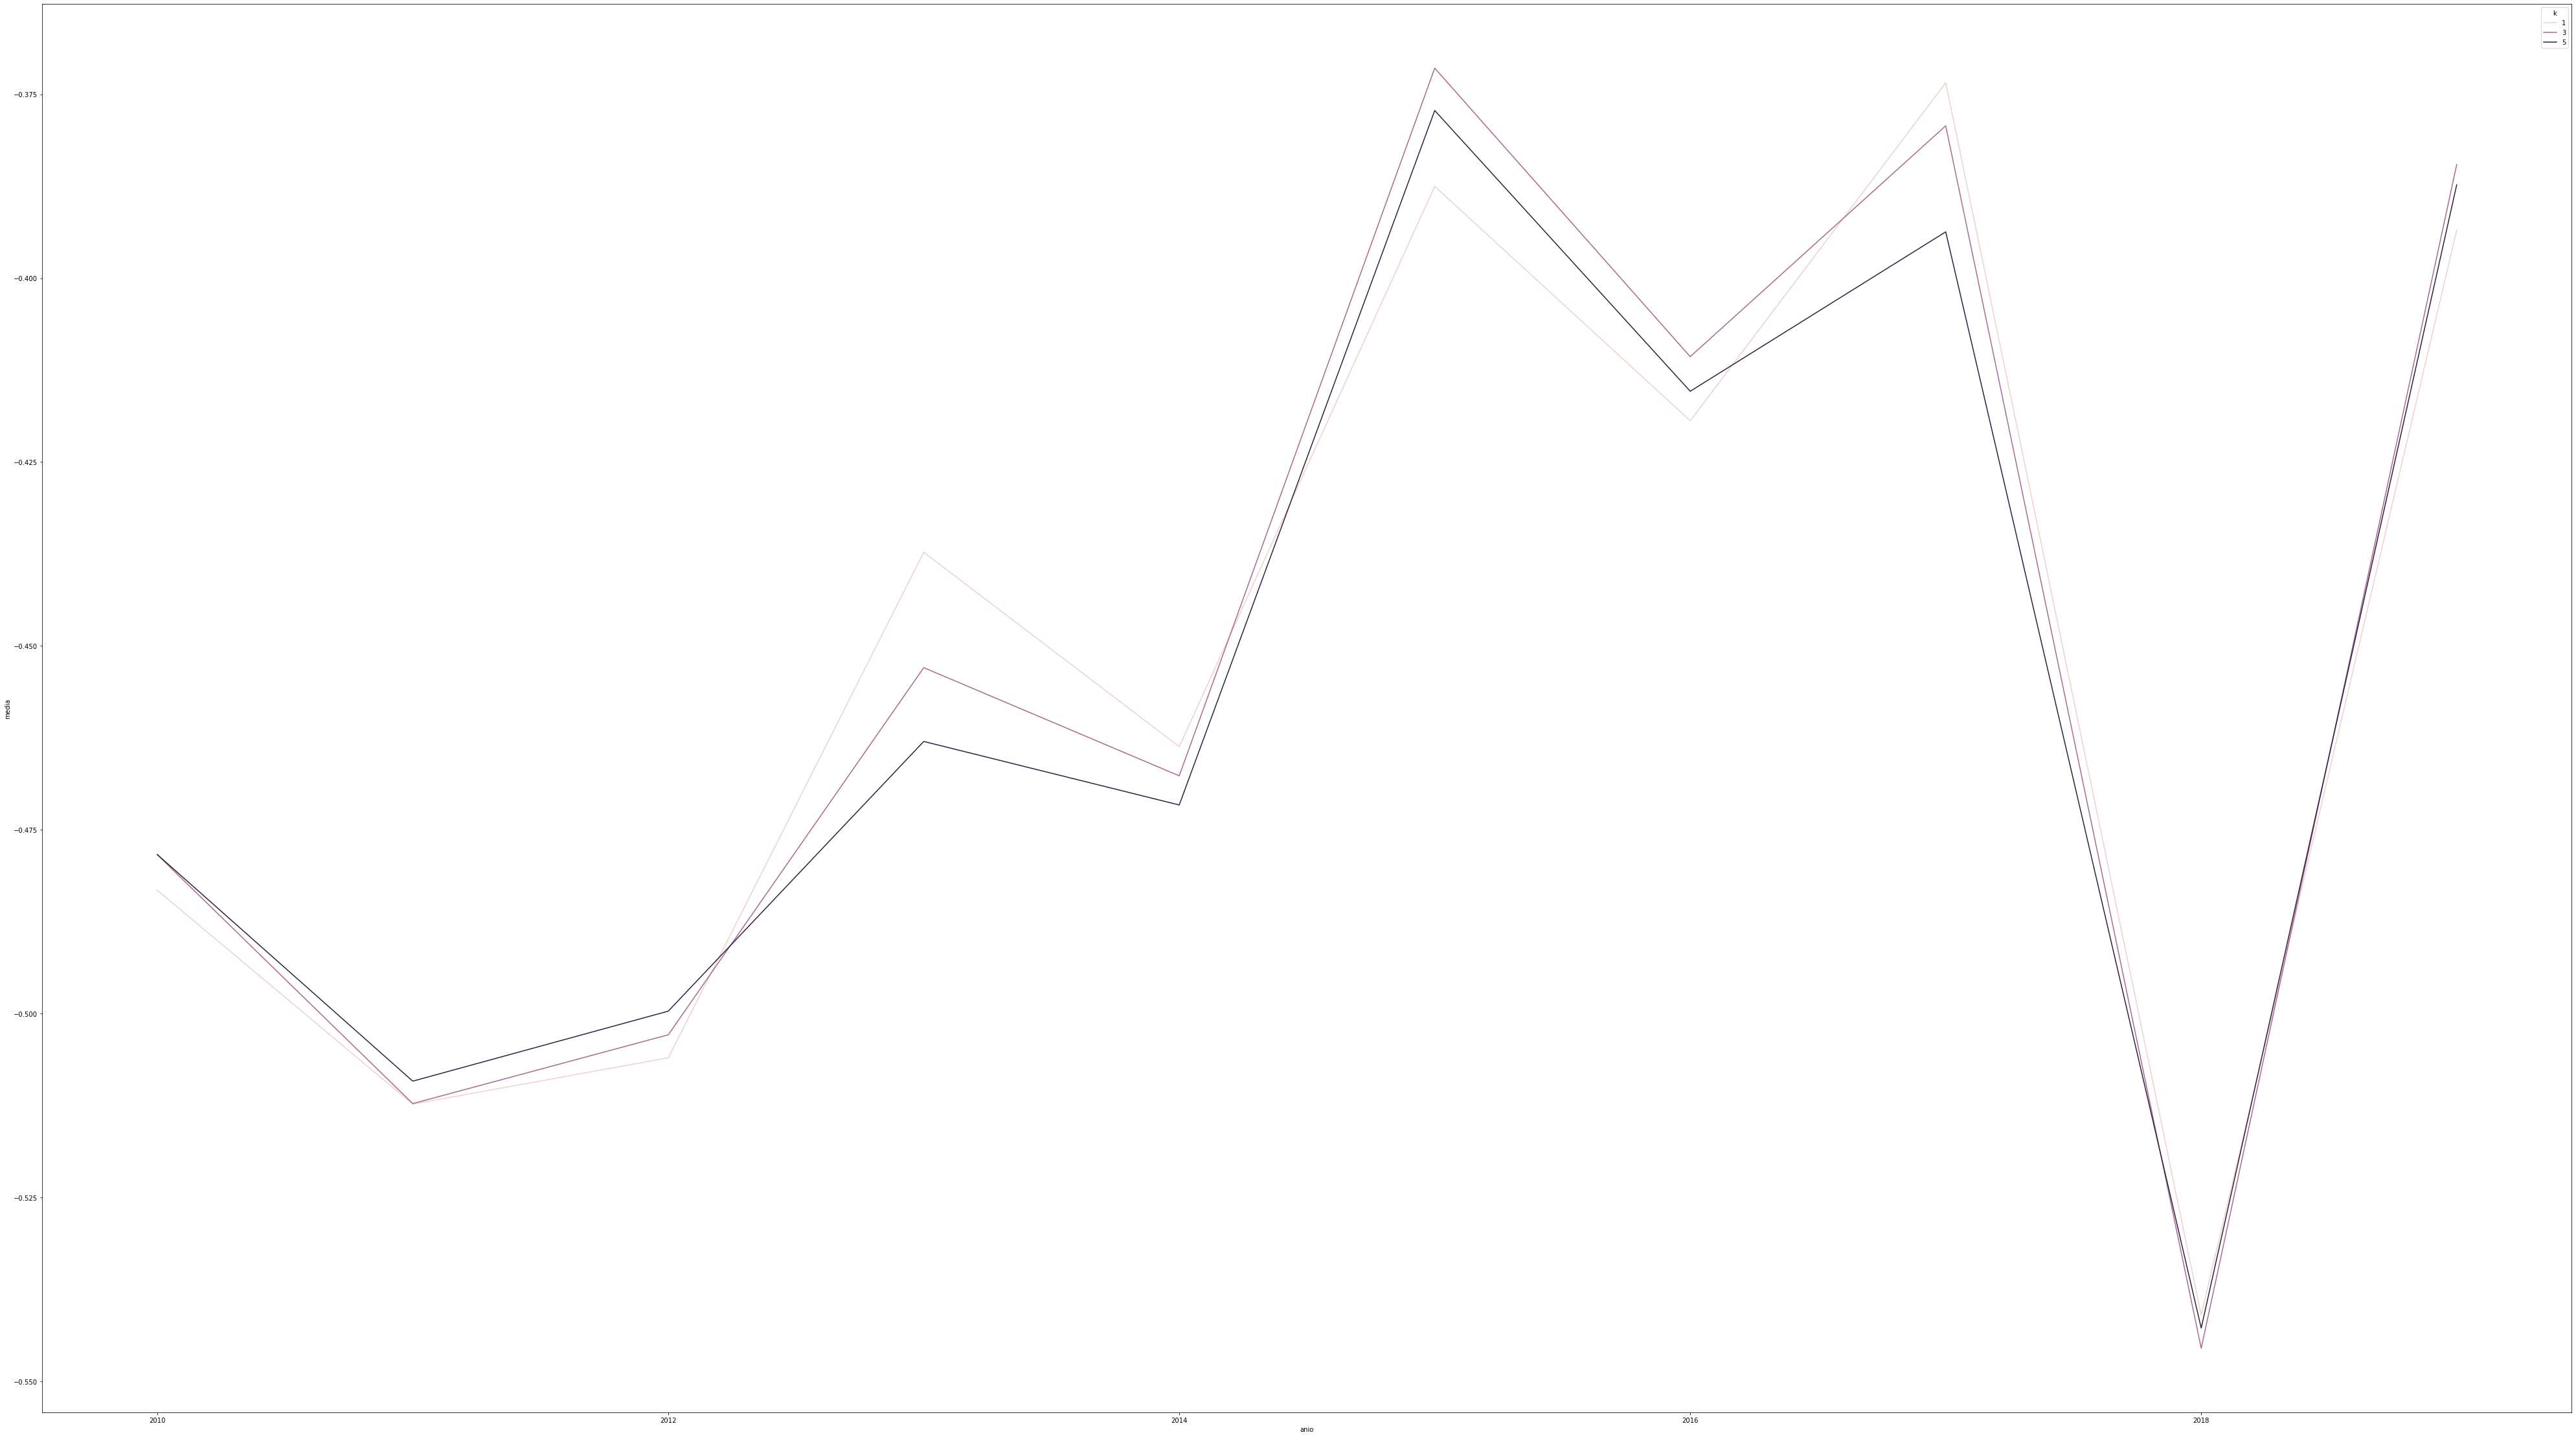

In [15]:
plt.figure(figsize=(70,40))
sns.lineplot(data=dataframe[dataframe.id == 3], x='anio', y = 'media', hue='k')

#### Y QUÉ VEMOS? YA ME CANSÉ